In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
data = pd.read_csv('SkillFactory. Unit 1. Task 1. movie_bd_v5.xls') #, encoding='utf8'

## 0. Dataset preview

In [3]:
data.sample(3)

,imdb_id,budget,revenue,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_average,release_year
141,tt2170439,42000000,106645357,Horrible Bosses 2,Jason Bateman|Jason Sudeikis|Charlie Day|Jenni...,Sean Anders,New Crime. Same Tools.,"Dale, Kurt and Nick decide to start their own ...",108,Comedy,New Line Cinema|BenderSpink|RatPac Entertainment,11/26/2014,6.1,2014
154,tt1121096,95000000,114178613,Seventh Son,Jeff Bridges|Julianne Moore|Ben Barnes|Alicia ...,Sergey Bodrov,"When darkness falls, the son will rise. When t...","John Gregory, who is a seventh son of a sevent...",102,Adventure|Fantasy,Legendary Pictures|Thunder Road Pictures|Outla...,12/12/2014,5.1,2014
748,tt1650062,50000000,260095987,Super 8,Joel Courtney|Elle Fanning|Riley Griffiths|Kyl...,J.J. Abrams,It Arrives.,"In 1979 Ohio, several youngsters are making a ...",112,Thriller|Science Fiction|Mystery,Paramount Pictures|Amblin Entertainment|Bad Ro...,6/8/2011,6.6,2011


In [4]:
data.describe()

,budget,revenue,runtime,vote_average,release_year
count,1.889000e+03,1.889000e+03,1889.000000,1889.000000,1889.000000
mean,5.431083e+07,1.553653e+08,109.658549,6.140762,2007.860773
std,4.858721e+07,2.146698e+08,18.017041,0.764763,4.468841
min,5.000000e+06,2.033165e+06,63.000000,3.300000,2000.000000
25%,2.000000e+07,3.456058e+07,97.000000,5.600000,2004.000000
50%,3.800000e+07,8.361541e+07,107.000000,6.100000,2008.000000
75%,7.200000e+07,1.782626e+08,120.000000,6.600000,2012.000000
max,3.800000e+08,2.781506e+09,214.000000,8.100000,2015.000000


In [5]:
# check data content
data.columns

Index(['imdb_id', 'budget', 'revenue', 'original_title', 'cast', 'director',
       'tagline', 'overview', 'runtime', 'genres', 'production_companies',
       'release_date', 'vote_average', 'release_year'],
      dtype='object')

In [6]:
# check for Nan, None values, data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1889 entries, 0 to 1888
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   imdb_id               1889 non-null   object 
 1   budget                1889 non-null   int64  
 2   revenue               1889 non-null   int64  
 3   original_title        1889 non-null   object 
 4   cast                  1889 non-null   object 
 5   director              1889 non-null   object 
 6   tagline               1889 non-null   object 
 7   overview              1889 non-null   object 
 8   runtime               1889 non-null   int64  
 9   genres                1889 non-null   object 
 10  production_companies  1889 non-null   object 
 11  release_date          1889 non-null   object 
 12  vote_average          1889 non-null   float64
 13  release_year          1889 non-null   int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 206.7+ KB


In [7]:
# check for heterogeneity : 
data.nunique()

imdb_id                 1889
budget                   203
revenue                 1885
original_title          1887
cast                    1878
director                 957
tagline                 1880
overview                1889
runtime                  105
genres                   652
production_companies    1624
release_date            1435
vote_average              47
release_year              16
dtype: int64

# Предобработка

In [8]:
answers = {} # создадим словарь для ответов

# тут другие ваши предобработки колонок например:

#the time given in the dataset is in string format.
#So we need to change this in datetime format
# ...

# calculate movie profit =  (revenue - budget):
data['profit'] = data.revenue - data.budget

# 1. У какого фильма из списка самый большой бюджет?

Использовать варианты ответов в коде решения запрещено.    
Вы думаете и в жизни у вас будут варианты ответов?)

In [9]:
# в словарь вставляем номер вопроса и ваш ответ на него
# Пример: 
answers['1'] = '2. Spider-Man 3 (tt0413300)'
# запишите свой вариант ответа
answers['1'] = '5. Pirates of the Caribbean: On Stranger Tides (tt1298650)'
# если ответили верно, можете добавить комментарий со значком "+"

In [10]:
# тут пишем ваш код для решения данного вопроса:

In [11]:
# Method 1 (max) :
data[data['budget'] == data['budget'].max()][['original_title','imdb_id']]

,original_title,imdb_id
723,Pirates of the Caribbean: On Stranger Tides,tt1298650


In [12]:
# make double check. Method 2 (sort_values by budget; take the highest) :
data.sort_values('budget', ascending=False).head(3)[['budget','original_title','imdb_id']]

,budget,original_title,imdb_id
723,380000000,Pirates of the Caribbean: On Stranger Tides,tt1298650
1669,300000000,Pirates of the Caribbean: At World's End,tt0449088
14,280000000,Avengers: Age of Ultron,tt2395427


Text(0.5, 1.0, 'Movies by budget, (USD M)')

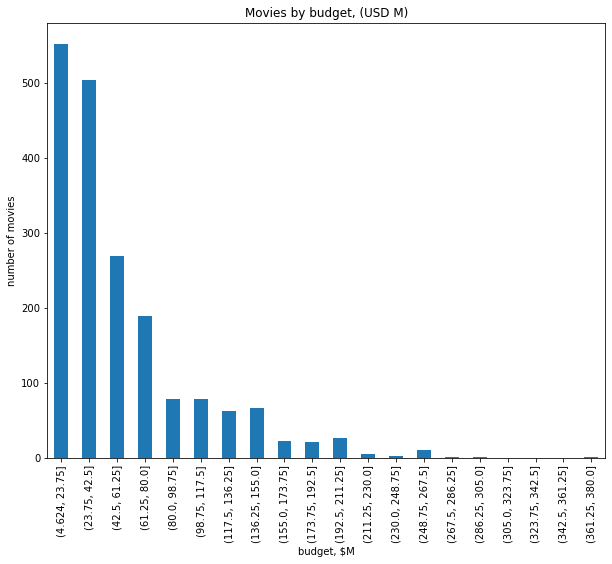

In [13]:
data_1 = data.copy()
plot_1 = data_1['budget'].apply(lambda x: x/1000000).value_counts(bins=20,sort=False).plot(
    kind='bar',
#     bins=50,
    xlabel='budget, $M',
    ylabel='number of movies',
    figsize=(10,8) # chart size
)
plot_1.set_title('Movies by budget, (USD M)')

# 2. Какой из фильмов самый длительный (в минутах)?

In [14]:
# думаю логику работы с этим словарем вы уже поняли, 
# по этому не буду больше его дублировать
answers['2'] = '2. Gods and Generals (tt0279111)'

In [15]:
# Method 1 (max by runtime)
data[data['runtime'] == data['runtime'].max()][['original_title','imdb_id','runtime']]

,original_title,imdb_id,runtime
1157,Gods and Generals,tt0279111,214


In [16]:
#make double check. Method 2 (sort_values by runtime, take top listed) :
data.sort_values('runtime',ascending=False).head(3)[['original_title','imdb_id','runtime']]

,original_title,imdb_id,runtime
1157,Gods and Generals,tt0279111,214
1081,The Lord of the Rings: The Return of the King,tt0167260,201
1736,Grindhouse,tt0462322,191


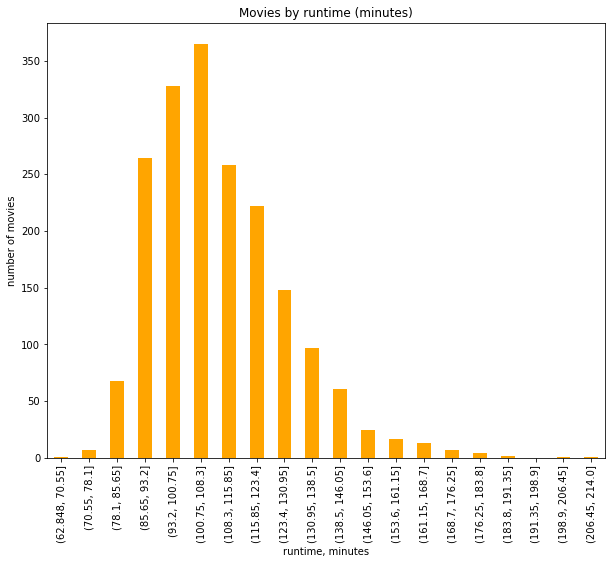

In [17]:
plot_2 = data.runtime.value_counts(bins=20,sort=False).plot(
    kind='bar',
    xlabel='runtime, minutes',
    ylabel='number of movies',
    color='orange',
    figsize=(10,8) # chart size
)
plot_2.set_title("Movies by runtime (minutes)");

# 3. Какой из фильмов самый короткий (в минутах)?





In [18]:
answers['3'] = '3. Winnie the Pooh (tt1449283)'

In [19]:
# Method 1 (min by runtime) :
data[data['runtime'] == data['runtime'].min()][['original_title','imdb_id','runtime']]

,original_title,imdb_id,runtime
768,Winnie the Pooh,tt1449283,63


In [20]:
# run double check. Method 2 (sort_values by runtime, take bottom listed)
data.sort_values('runtime').head(3)[['original_title','imdb_id','runtime']]

,original_title,imdb_id,runtime
768,Winnie the Pooh,tt1449283,63
930,Return to Never Land,tt0280030,72
1097,The Jungle Book 2,tt0283426,72


# 4. Какова средняя длительность фильмов?


In [21]:
answers['4'] = '2. 110'

In [22]:
# Method 1 (mean of runtime) :
round(data.runtime.mean(),0)

110.0

In [23]:
# make double check. Method 2 (calclulate meant val) :
round(data.runtime.sum() / data.runtime.count(),0)

110.0

## box and whisker plot 

The box extends from the **lower** to **upper** **quartile** values of the data, with a **line at the median**. 

The **whiskers** extend from the box to show the range of the data. 

**Flier points** are those past the end of the whiskers.

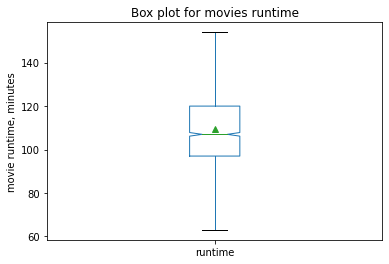

In [24]:
green_diamond = dict(
    markerfacecolor='g', 
    marker='D',
)

plot_4 = data.runtime.plot(
    kind='box',
    ylabel='movie runtime, minutes',
    notch=True,
    showmeans=True,
#     flierprops=green_diamond,  # <= OK
    showfliers=False,
    
)
plot_4.set_title('Box plot for movies runtime');
# plot_4.text(3,2,'some text')

# 5. Каково медианное значение длительности фильмов? 

In [25]:
answers['5'] = '1. 107'

In [26]:
# Method 1 (median of runtime) :
data.runtime.median()

107.0

In [27]:
# make double check. Method 2 (get center as slice) :
runtime = data.sort_values('runtime').runtime
runtime.iloc[len(runtime)//2:len(runtime)//2+1]


412    107
Name: runtime, dtype: int64

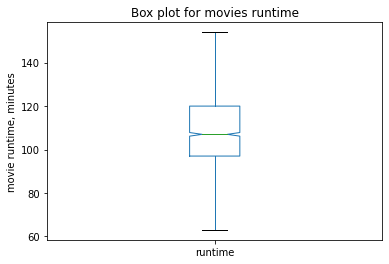

In [28]:
green_diamond = dict(
    markerfacecolor='g', 
    marker='D',
)

plot_4 = data.runtime.plot(
    kind='box',
    ylabel='movie runtime, minutes',
    notch=True,
#     showmeans=True,
#     flierprops=green_diamond,  # <= OK
    showfliers=False,
    
)
plot_4.set_title('Box plot for movies runtime');
# plot_4.text(3,2,'some text')

# 6. Какой самый прибыльный фильм?
#### Внимание! Здесь и далее под «прибылью» или «убытками» понимается разность между сборами и бюджетом фильма. (прибыль = сборы - бюджет) в нашем датасете это будет (profit = revenue - budget) 

In [29]:
# лучше код получения столбца profit вынести в Предобработку что в начале
answers['6'] = '5. Avatar (tt0499549)'

In [30]:
# Method 1 (max of profit) : 
data[data.profit == data.profit.max()]\
    .apply(lambda x: '{0}. {1} ({2}): {3}'.format(x.name, x['original_title'], x['imdb_id'], x['profit']), axis=1)\
    .head(1)

239    239. Avatar (tt0499549): 2544505847
dtype: object

In [31]:
# make double check. Method 2 (sort_values by profit, take toplisted) :
data.sort_values('profit', ascending=False)\
    .apply(lambda x: '{0}. {1} ({2}): {3}'.format(x.name, x['original_title'], x['imdb_id'], x['profit']), axis=1)\
    .head(1)
# other methods to display the output:
# data.sort_values('profit', ascending=False)[['original_title','imdb_id','profit']].head(1)
# data.sort_values('profit', ascending=False).apply(lambda x: '%s. %s (%s): %d' % (x.name, x['original_title'], x['imdb_id'], x['profit']), axis=1).head(2)

239    239. Avatar (tt0499549): 2544505847
dtype: object

In [32]:
# make double check. Method 3 (get max profit form describe) :
data.describe().loc['max','profit']

2544505847.0

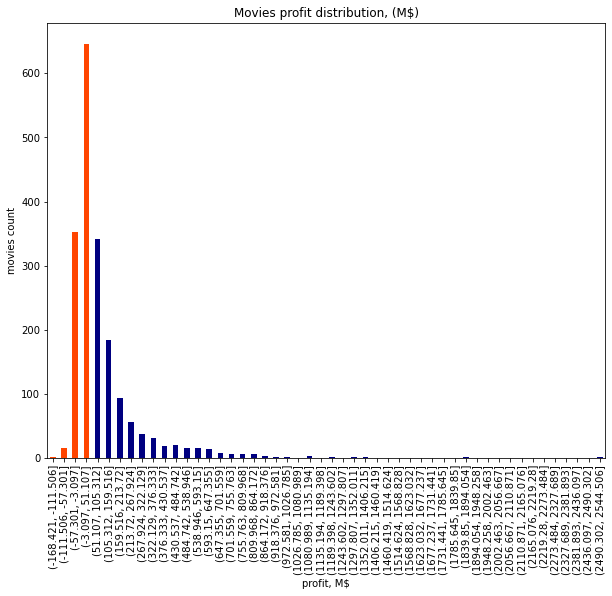

In [33]:
data_6 = data.copy()
profit_bins = data_6.profit.apply(lambda x: x/1e6).value_counts(bins=50, sort=False)
plot_6 = profit_bins.plot(
    kind='bar',
    xlabel='profit, M$',
    ylabel='movies count',
    color= pd.Series([x > 0 for x in profit_bins.index.left]).map({True:'navy', False:'orangered'}),
    figsize=(10,8) # chart size
)
plot_6.set_title('Movies profit distribution, (M$)');

# 7. Какой фильм самый убыточный? 

In [34]:
answers['7'] = '5. The Lone Ranger (tt1210819)'

In [35]:
# Method 1 (min by profit):
data[data.profit == data.profit.min()].apply(
    lambda x: '{0}. {1} ({2}): {3}'.format(x.name, x['original_title'], x['imdb_id'], x['profit']), axis=1)

1245    1245. The Lone Ranger (tt1210819): -165710090
dtype: object

In [36]:
# make double check. Method 2 (get min from describe) :
data.describe().loc['min','profit']

-165710090.0

# 8. У скольких фильмов из датасета объем сборов оказался выше бюджета?

In [37]:
answers['8'] = '1. 1478'

In [38]:
# Method 1 (filter by revenue > budget) :
data[data.revenue > data.budget].imdb_id.count()

1478

In [39]:
# make double check. Method 2 (filter by profit, get number from describe) :
data[data.profit > 0].describe().loc['count']

budget          1478.0
revenue         1478.0
runtime         1478.0
vote_average    1478.0
release_year    1478.0
profit          1478.0
Name: count, dtype: float64

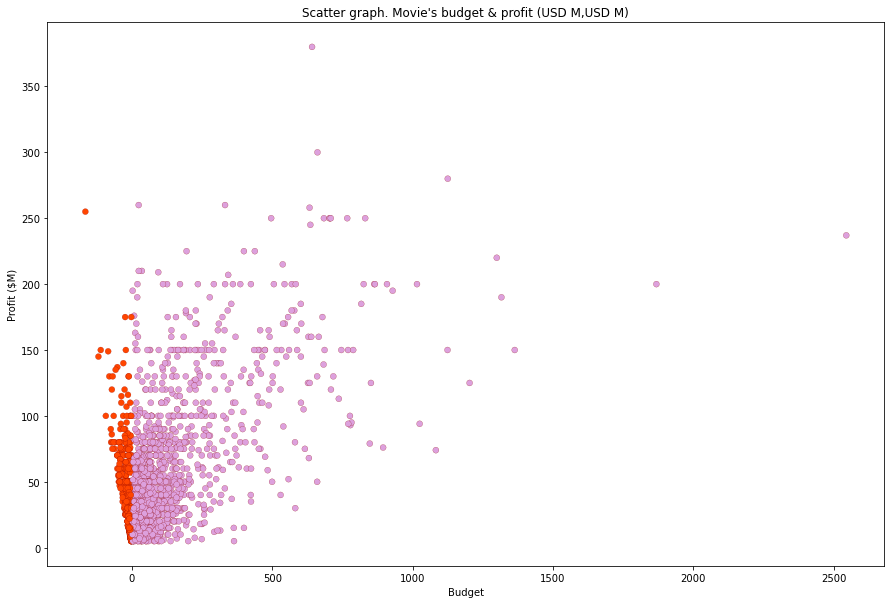

In [40]:
fig, plot_8 = plt.subplots(figsize=(15,10)) # chart size
# plot_8 = data[['profit','budget']].apply(lambda x: x/1e6).plot(
#     kind='scatter',
#     x='profit', 
#     y='budget',
#  .....
plot_8.scatter(
    x=data['profit'].apply(lambda x: x/1e6), 
    y=data['budget'].apply(lambda x: x/1e6),    
    
#     color='plum',
    color= pd.Series([x > 0 for x in data.profit]).map({True:'plum', False:'orangered'}),
    edgecolors='darkred', # edge color
    linewidths=0.2,  # edge line
)
plot_8.set_title("Scatter graph. Movie's budget & profit (USD M,USD M)")

plot_8.set_xlabel('Budget')
plot_8.set_ylabel('Profit ($M)');

# 9. Какой фильм оказался самым кассовым в 2008 году?

In [41]:
answers['9'] = '4. The Dark Knight (tt0468569)'

In [42]:
# Method 1 (filter by release_year, get max by revenue) :
data_9 = data[data.release_year == 2008].copy()
data_9[data_9.revenue == data_9.revenue.max()]\
    .apply(lambda x: '{0}. {1} ({2}): {3}'.format(x.name, x['original_title'], x['imdb_id'], x['revenue']), axis=1)

599    599. The Dark Knight (tt0468569): 1001921825
dtype: object

In [43]:
# make double check. Method 2 (filter by release_year, sort, get topmost) :
data[data.release_year == 2008].sort_values(by='revenue', ascending=False).iloc[0]\
    .loc[['original_title','revenue','imdb_id']]

original_title    The Dark Knight
revenue                1001921825
imdb_id                 tt0468569
Name: 599, dtype: object

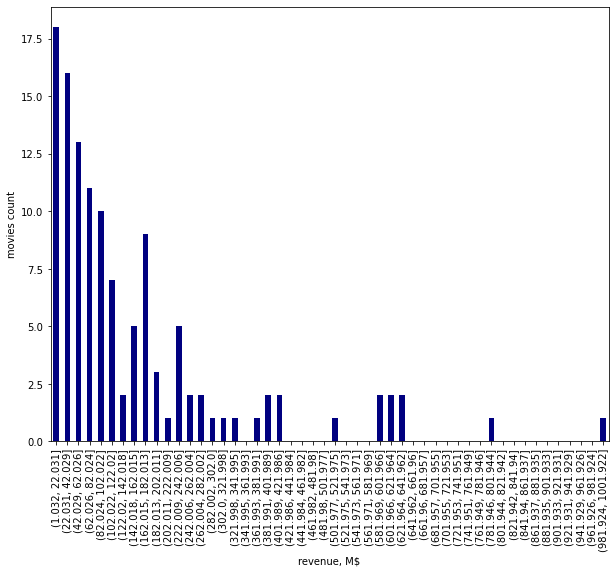

In [44]:
revenue_bins = data_9.revenue.apply(lambda x: x/1e6).value_counts(bins=50, sort=False)
plot_9 = revenue_bins.plot(
    kind='bar',
    xlabel='revenue, M$',
    ylabel='movies count',
    color= pd.Series([x > 0 for x in revenue_bins.index.left]).map({True:'navy', False:'orangered'}),
    figsize=(10,8) # chart size
)
plot_6.set_title('Movies profit distribution, (M$)');

# 10. Самый убыточный фильм за период с 2012 по 2014 г. (включительно)?


In [45]:
answers['10'] = '5. The Lone Ranger (tt1210819)'

In [46]:
# Method 1 (filter by release_year, get min by profit from subset) :
data_10 = data[(data.release_year >= 2012) & (data.release_year <= 2014)].copy()
data_10[data_10.profit == data_10.profit.min()]\
    .apply(lambda x: '{0}. {1} ({2}): {3}'.format(x.name, x['original_title'], x['imdb_id'], x['profit']), axis=1)

1245    1245. The Lone Ranger (tt1210819): -165710090
dtype: object

In [47]:
# make double check. Method 2 (release_year ISIN([..,..]); get min by profit from subset):
# release_year.ISIN([..,..]) :
data_10b = data[data.release_year.isin([2012,2013,2014])].copy()
data_10b[data_10b.profit == data_10b.profit.min()]\
    .apply(lambda x: '{0}. {1} ({2}): {3}'.format(x.name, x['original_title'], x['imdb_id'], x['profit']), axis=1)

1245    1245. The Lone Ranger (tt1210819): -165710090
dtype: object

In [48]:
# make double check. Method 3 (filter by release_year, get min profit from discribe) :
data_10.describe().loc['min','profit']

-165710090.0

# 11. Какого жанра фильмов больше всего?

In [49]:
# эту задачу тоже можно решать разными подходами, попробуй реализовать разные варианты
# если будешь добавлять функцию - выноси ее в предобработку что в начале
answers['11'] = '3. Drama'

ВАРИАНТ 2

In [50]:
# Method 1 (strs->lists; lists->sum()->joined_list; joined_list->Counter; counter->get_most_common) :
from collections import Counter
c = Counter(data.genres.str.lower().str.split('|').sum())
c.most_common(1)[0][0]

'drama'

In [51]:
# make double check. Method 2 (str->lists; lists->explode; value_counts) :
data_11 = data.copy()
data_11['genre'] = data_11.genres.str.lower().str.split('|')
data_11  = data_11.explode('genre')
data_11.genre.value_counts()
# data_11.groupby('genres_list').count().sort_values(by='imdb_id', ascending=False).head(10) <= OK as well

drama              782
comedy             683
thriller           596
action             582
adventure          415
crime              315
romance            308
family             260
science fiction    248
fantasy            222
horror             176
mystery            168
animation          139
music               64
history             62
war                 58
western             19
documentary          8
foreign              2
Name: genre, dtype: int64

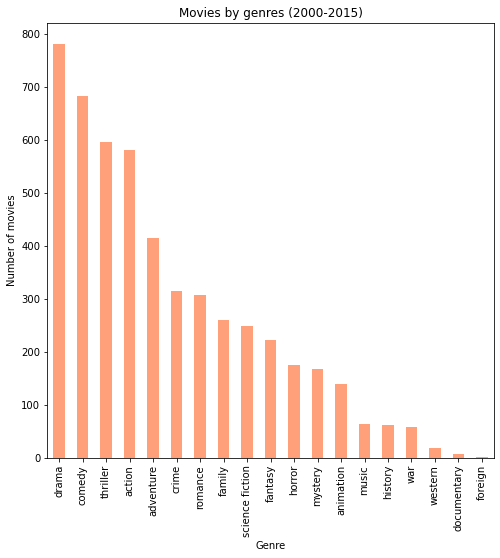

In [52]:
fig, plot_11 = plt.subplots(figsize=(8,8)) # chart size
plot_11 = data_11['genre'].value_counts().plot(
    kind='bar',
    color='lightsalmon',
    xlabel='Genre',
    ylabel='Number of movies',
)
plot_11.set_title('Movies by genres (2000-2015)');

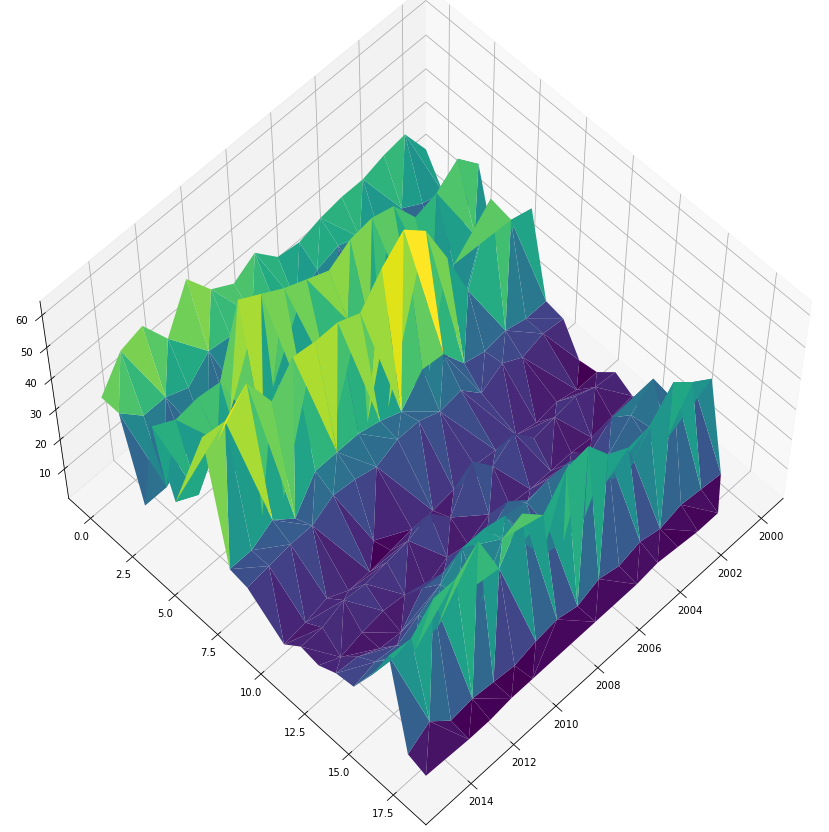

,genre,x
0,action,0
16,adventure,1
32,animation,2
48,comedy,3
64,crime,4
80,documentary,5
87,drama,6
103,family,7
119,fantasy,8
135,foreign,9


In [53]:
data_11b = data_11.groupby(by=['genre','release_year']).imdb_id.count()
data_11c = data_11b.reset_index()
# And transform the old column name in something numeric
data_11c['x']=pd.Categorical(data_11c['genre'])
data_11c['x']=data_11c['x'].cat.codes
data_11c = data_11c.rename(columns={'release_year':'y','imdb_id':'z'})

fig = plt.figure(figsize=(15,15)) # chart size
ax = fig.gca(projection='3d')
ax.plot_trisurf(data_11c['y'], data_11c['x'], data_11c['z'], cmap=plt.cm.viridis, linewidth=0.2)
ax.view_init(60, 45) # chart rotate

plt.show()

data_11c[['genre','x']].drop_duplicates()

# 12. Фильмы какого жанра чаще всего становятся прибыльными? 

In [54]:
answers['12'] = '1. Drama'

In [55]:
# Method 1 (strs->lists; lists->sum()->joined_list; joined_list->Counter; counter->get_most_common) :
c = Counter(data[data.profit > 0].genres.str.lower().str.split('|').sum())
c.most_common(1)[0][0]

'drama'

In [56]:
# make double check. Method 2 (str->lists; lists->explode; value_counts) :
data_12 = data[data.profit > 0].copy()
data_12['genre']  = data_12.genres.str.lower().str.split('|')
data_12 = data_12.explode('genre')
data_12['genre'].value_counts().head(3)
# data_11[data_11.profit > 0].groupby('genres_list').count().sort_values(by='imdb_id', ascending=False).head(10)

drama       560
comedy      551
thriller    446
Name: genre, dtype: int64

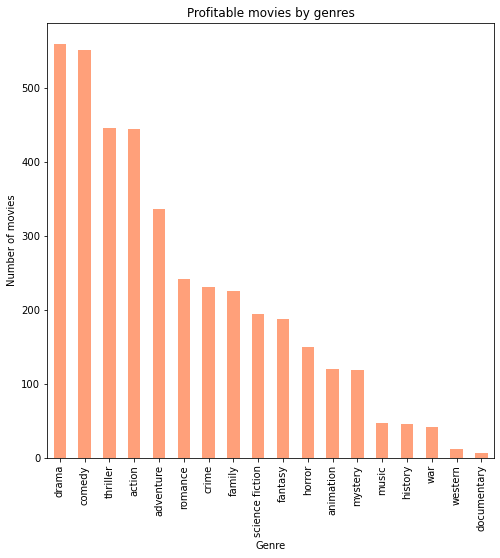

In [57]:
fig, plot_12a = plt.subplots(figsize=(8,8)) # chart size
plot_12a = data_12['genre'].value_counts().plot(
    kind='bar',
    color='lightsalmon',
    xlabel='Genre',
    ylabel='Number of movies',
)
plot_12a.set_title('Profitable movies by genres');

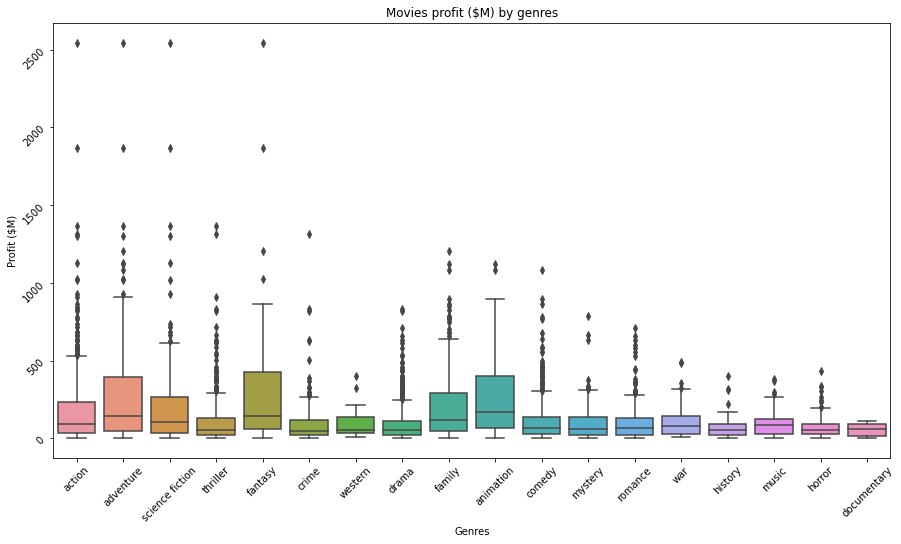

In [58]:
# below graph doesn't answer the question. But it helps to understand profit by genres.
data_12b=data_12
fig, plot_12b = plt.subplots(figsize=(15,8)) # chart size
plot_12b = sns.boxplot(x=data_12b['genre'], y=data_12b['profit'].apply(lambda x: x/1e6));
plot_12b.set_title('Movies profit ($M) by genres')
plot_12b.set_xlabel('Genres')
plot_12b.set_ylabel('Profit ($M)')
plot_12b.tick_params(labelrotation=45)

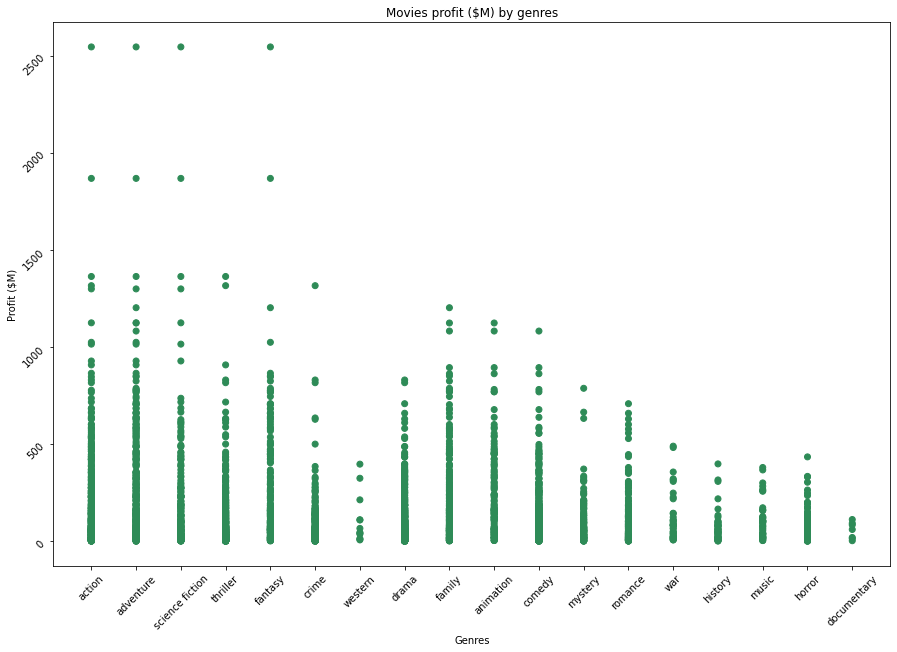

In [59]:
# below graph doesn't answer the question. But it helps to understand profit by genres.
fig, plot_12c = plt.subplots(figsize=(15,10)) # chart size
plot_12c.scatter(
    data_12b['genre'].tolist(),
    data_12b['profit'].apply(lambda x: x/1e6).tolist(),
#     color='plum',
    color= pd.Series([x > 0 for x in data_12b['profit']]).map({True:'seagreen', False:'tomato'}),
#     edgecolors='darkred', # edge color
#     linewidths=0.2,  # edge line
)
plot_12c.set_title('Movies profit ($M) by genres')
# Set common labels
plot_12c.set_xlabel('Genres')
plot_12c.set_ylabel('Profit ($M)')
plot_12c.tick_params(labelrotation=45)

# 13. У какого режиссера самые большие суммарные кассовые сборы?

In [60]:
answers['13'] = '5. Peter Jackson'

In [61]:
# Method 1 (explode directors, group by directors, sum revenue) :
data_13 = data.copy()
data_13['director_one'] = data_13.director.str.lower().str.split('|')
data_13.explode('director_one').groupby('director_one').revenue.sum().sort_values(ascending=False).head(3)

director_one
peter jackson        6490593685
christopher nolan    4167548502
david yates          4154295625
Name: revenue, dtype: int64

In [62]:
# make double check. Method 2 (explode directors, get sum of revenue in pivot table) :
data_13b = data_13.explode('director_one')
data_13b.pivot_table(values='revenue', index='director_one', aggfunc='sum').sort_values('revenue', ascending=False).head(3)

,revenue
director_one,
peter jackson,6490593685
christopher nolan,4167548502
david yates,4154295625


In [63]:
# make double check. Method 3 (split string to array, explode array in one line) :
data_13c = data[['original_title', 'imdb_id','revenue','director']]\
    .set_index(['original_title', 'imdb_id','revenue']).apply(lambda x: x.str.split('|').explode()).reset_index()
data_13c['director_one'] = data_13c['director'].str.strip().str.lower()
data_13c.groupby('director_one').sum('revenue').sort_values(by='revenue', ascending=False).head(3)


,revenue
director_one,
peter jackson,6490593685
christopher nolan,4167548502
david yates,4154295625


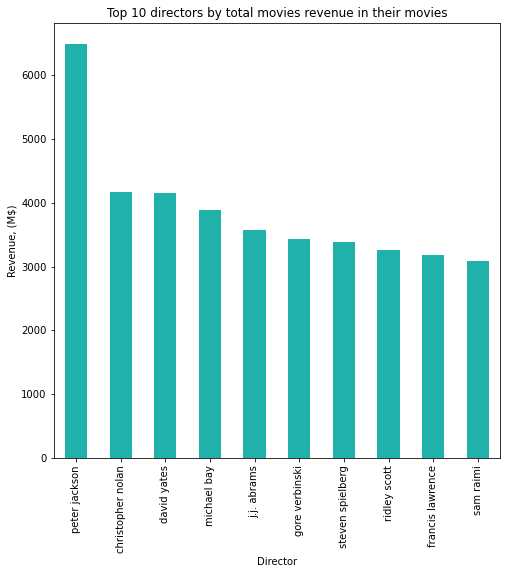

In [64]:
fig, plot_13 = plt.subplots(figsize=(8,8))
plot_13 = data_13b.groupby('director_one').revenue.sum().sort_values(ascending=False)\
    .head(10).apply(lambda x: x/1e6).plot(
    kind='bar',
    color='lightseagreen',
    xlabel='Director',
    ylabel='Revenue, (M$)',
)
plot_13.set_title('Top 10 directors by total movies revenue in their movies');

# 14. Какой режисер снял больше всего фильмов в стиле Action?

In [65]:
answers['14'] = '3. Robert Rodriguez'

In [66]:
# Method 1 (explode directors; filter str.contains("Action"); value_counts by directors ) :
data_14 = data.copy()
data_14['director_one'] = data_14.director.str.lower().str.split('|')
data_14 = data_14.explode('director_one')
data_14[data_14.genres.str.contains("Action")].director_one.value_counts().head(5)

robert rodriguez      9
paul w.s. anderson    7
michael bay           7
ridley scott          6
antoine fuqua         6
Name: director_one, dtype: int64

In [67]:
# make double check. Method 2 (query contains action; split direcotrs; Counter directors) :
data_14b = data.copy()
subset = data_14b.query('genres.str.lower().str.contains("action")', engine='python').director
# subset = data_14b[data_14b.genres.str.lower().str.contains("action")].director <= OK as well
c = Counter(subset.str.lower().str.split('|').sum())
c.most_common(1)

[('robert rodriguez', 9)]

In [68]:
# make double check. Method 3 (explode genres; explode direcotrs; filter genre; value_counts by director ):
data_14c = data.copy()
data_14c['genre'] = data_14c.genres.str.lower().str.split('|').apply(lambda x: [i.strip() for i in x])
data_14c = data_14c.explode('genre')
# data_14c.head(10)
data_14c['director_one'] = data_14c.director.str.lower().str.split('|').apply(lambda x: [i.strip() for i in x])
data_14c = data_14c.explode('director_one')
data_14c[data_14c.genre == 'action'].director_one.value_counts().head(5)
# data_14c.head(10)

robert rodriguez      9
paul w.s. anderson    7
michael bay           7
ridley scott          6
antoine fuqua         6
Name: director_one, dtype: int64

In [69]:
# make double check. Method 4 (explode directors; filter genre; group by directors; count & sort) :
data_14d = data.copy()
data_14d['director_one'] = data_14d.director.str.lower().str.split('|')
data_14d = data_14d.explode('director_one')
data_14d[data_14d.genres.str.contains("Action")][['original_title', 'director_one', 'genres']]\
    .groupby('director_one').count().sort_values('genres', ascending=False).head(3)

,original_title,genres
director_one,,
robert rodriguez,9,9
michael bay,7,7
paul w.s. anderson,7,7


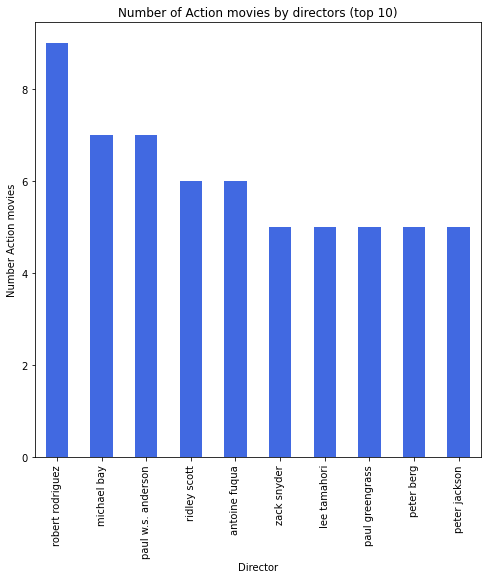

In [70]:
fig, plot_14a = plt.subplots(figsize=(8,8))
plot_14a = data_14d[data_14d.genres.str.contains("Action")].groupby('director_one').revenue.count().sort_values(ascending=False)\
    .head(10).plot(
    kind='bar',
    color='royalblue',
    xlabel='Director',
    ylabel='Number Action movies',
)
plot_14a.set_title('Number of Action movies by directors (top 10)');

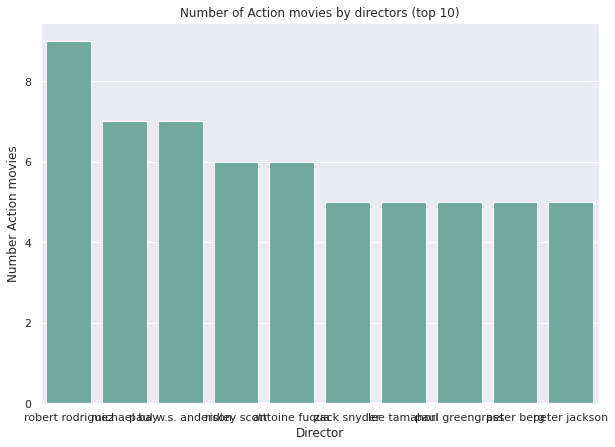

In [71]:
data_14e = data_14d[data_14d.genres.str.contains("Action")].groupby('director_one').revenue.count().sort_values(ascending=False)\
    .head(10).reset_index()
data_14e

# set plot style: grey grid in the background:
sns.set(style="darkgrid")
# Set the figure size
plt.figure(figsize=(10, 7))
# plot a bar chart
plot_14b = sns.barplot(
    data=data_14e, 
    x="director_one", 
    y="revenue", 
    color='#69b3a2');
plot_14b.set(
    xlabel='Director', 
    ylabel='Number Action movies', 
    title='Number of Action movies by directors (top 10)');
# plt.show()

# 15. Фильмы с каким актером принесли самые высокие кассовые сборы в 2012 году? 

In [72]:
answers['15'] = '3. Chris Hemsworth'

In [73]:
# Method 1 (filter by year, explode by actor, group and sum) :
data_15 = data[data['release_year'] == 2012].copy()
data_15['actor'] = data_15.cast.str.lower().str.split('|')
data_15 = data_15.explode('actor').groupby('actor').revenue.sum().sort_values(ascending=False).head(20)
data_15.head(5)

actor
chris hemsworth      2027450773
denis leary          1629460639
anne hathaway        1522851057
robert downey jr.    1519557910
mark ruffalo         1519557910
Name: revenue, dtype: int64

In [74]:
# make double check. Method 2 (filer by year. Explode and group by actors, sum(revenue), find max) :
data_15b = data.copy()
data_15b['actor'] = data_15b.cast.str.lower().str.split('|')
data_15b = data_15b.explode('actor')
# data_15b.head(10)
df_pivot = data_15b.pivot_table(
    values='revenue', 
    index='actor',
    columns='release_year', 
    aggfunc='sum', 
    fill_value=0)
# df_pivot
df_pivot.sort_index(axis=1, level=0, sort_remaining=False).sort_values(by=2012, ascending=False)

release_year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
actor,,,,,,,,,,,,,,,,
chris hemsworth,0,0,0,0,0,0,0,0,0,22852638,0,444115007,2027450773,570012624,0,1620993653
denis leary,0,0,383257136,0,0,0,660940780,0,0,0,0,0,1629460639,0,0,0
anne hathaway,0,165335153,0,0,122538202,229097548,326551094,37311672,230685453,114663461,1128287118,544025193,1522851057,0,1121940915,194564672
robert downey jr.,0,0,0,141591324,0,0,68875001,84785914,773246871,555748837,835714155,334615000,1519557910,1215439994,83719388,1405035767
mark ruffalo,0,27642707,77628265,0,386478114,191787993,0,84785914,5530764,0,294804195,0,1519557910,181163755,12096300,1493382240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
goran visnjic,0,0,383257136,0,0,56681566,0,0,0,0,0,232617430,0,71009334,0,0
gordon liu chia-hui,0,0,0,0,152159461,0,0,0,0,0,0,0,0,0,0,0
gordon pinsent,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3430018,0


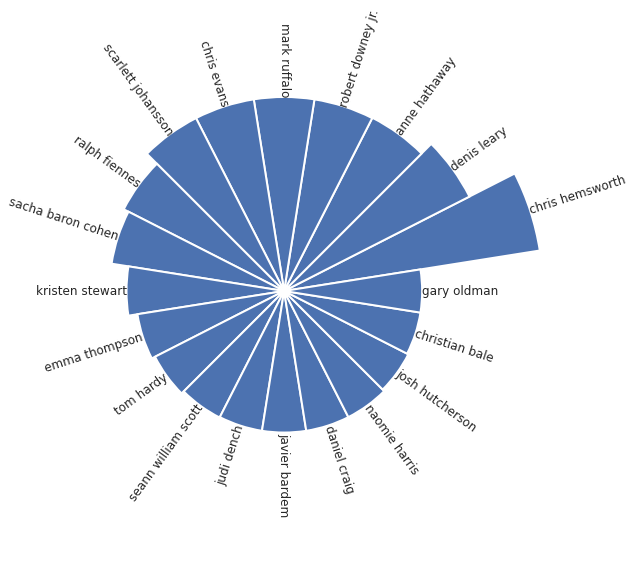

In [75]:
# set figure size
plt.figure(figsize=(20,10))

# plot polar axis
ax = plt.subplot(111, polar=True)

# remove grid
plt.axis('off')

# Set the coordinates limits
upperLimit = 100
lowerLimit = 30

# Compute max and min in the dataset
max = data_15.max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * data_15 + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(data_15.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(data_15.index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white")

# little space between the bar and the label
labelPadding = 4

# Add labels
for bar, angle, height, label in zip(bars,angles, heights, data_15.index):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 

# 16. Какой актер снялся в большем количестве высокобюджетных фильмов? 

### Поясненине: где бюджет выше среднего по данной выборке.

In [76]:
answers['16'] = '3. Matt Damon'

In [77]:
# Method 1 (filter by budget, split actors, merge list from cast column, count actor's appearance)
print('Mean budget: ', data.budget.mean())
data_16 = data[data.budget >= data.budget.mean()].copy()
c = Counter(data_16.cast.str.lower().str.split('|').sum())
c.most_common(5)

Mean budget:  54310829.63843303


[('matt damon', 18),
 ('adam sandler', 17),
 ('angelina jolie', 16),
 ('tom cruise', 15),
 ('samuel l. jackson', 15)]

In [78]:
# make double check. Method 2 (filter by budget, explode actor, group and count by actors) :
data_16b = data[data.budget >= data.budget.mean()].copy()
data_16b['actor'] = data_16b.cast.str.lower().str.split('|')
data_16b = data_16b.explode('actor')
data_16b.groupby('actor').count().sort_values(by='revenue', ascending=False).head(5)

,imdb_id,budget,revenue,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_average,release_year,profit
actor,,,,,,,,,,,,,,,
matt damon,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18
adam sandler,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17
angelina jolie,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
tom cruise,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15
eddie murphy,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15


In [79]:
# https://www.python-graph-gallery.com/wordcloud/
# from wordcloud import WordCloud
# import matplotlib.pyplot as plt

# Create a list of word
# text=c.most_common(10).elements()

# # Create the wordcloud object
# wordcloud = WordCloud(width=480, height=480, margin=0).generate(text)

# # Display the generated image:
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")
# plt.margins(x=0, y=0)
# plt.show()

# 17. В фильмах какого жанра больше всего снимался Nicolas Cage? 

In [80]:
answers['17'] = '2. Action'

In [81]:
# Method 1 (Filter rows with str.contains('nicolas cage')) :
data_17 = data[data.cast.str.lower().str.contains('nicolas cage')].copy()
# Process "genres" series only. Split str to list, sum lists, process with Counter : 
c = Counter(data_17.genres.str.lower().str.split('|').sum())
c.most_common(5)[0][0]

'action'

In [82]:
# make double check. Method 2 (Filter by contains('nicolas cage'), explode genre, group by genre, count) :
data_17b = data[data.cast.str.lower().str.contains('nicolas cage')].copy()
data_17b['genre'] = data_17b.genres.str.lower().str.split('|')
data_17b = data_17b.explode('genre')
data_17b.groupby('genre').count().sort_values(by='revenue', ascending=False).head(5)

,imdb_id,budget,revenue,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_average,release_year,profit
genre,,,,,,,,,,,,,,,
action,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17
thriller,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15
drama,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
crime,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
fantasy,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8


# 18. Самый убыточный фильм от Paramount Pictures

In [83]:
answers['18'] = '1. K-19: The Widowmaker (tt0267626)'

In [84]:
# Method 1 (filter by contains('paramount pictures'), filter row with min profit) :
data_18 = data[data.production_companies.str.lower().str.contains('paramount pictures')].copy()
data_18[data_18.profit == data_18.profit.min()]\
    .apply(lambda x: '{0}. {1} ({2}): {3}'.format(x.name, x['original_title'], x['imdb_id'], x['profit']), axis=1)

925    925. K-19: The Widowmaker (tt0267626): -64831034
dtype: object

In [85]:
# make double check. Method 2 (filter by contains('paramount pictures'), sort by profit asc, take the topmost) : :
data_18b = data[data.production_companies.str.lower().str.contains('paramount pictures')].copy()
data_18b.sort_values(by='profit', ascending=True)\
    .head(3)[['imdb_id','original_title','profit','production_companies']]

,imdb_id,original_title,profit,production_companies
925,tt0267626,K-19: The Widowmaker,-64831034,Paramount Pictures|Intermedia Films|National G...
1123,tt0300556,Timeline,-60519261,Paramount Pictures|Donners' Company|Mutual Fil...
1722,tt0435705,Next,-51788987,Paramount Pictures|Virtual Studios|Revolution ...


# 19. Какой год стал самым успешным по суммарным кассовым сборам?

In [86]:
answers['19'] = '5. 2015'

In [87]:
# Method 1 (groupby by release_year & sum by revenue & sort_values) :
data_19 = data.copy()
# data_19.groupby('release_year').sum().sort_values(by='revenue', ascending=False)['revenue'].head(5)
data_19a = data_19.groupby('release_year').revenue.sum().sort_values(ascending=False).head(5)
data_19a

release_year
2015    25449202382
2014    23405862953
2013    23213799791
2012    23079001687
2011    22676791872
Name: revenue, dtype: int64

In [88]:
# make double check. Method 2 (pivot_table) :
data_19b = data.copy()
data_19b.pivot_table(
    values='revenue', 
    index='release_year',
    aggfunc='sum', 
    fill_value=0).sort_values(by='revenue', ascending=False).head(5)

,revenue
release_year,
2015,25449202382
2014,23405862953
2013,23213799791
2012,23079001687
2011,22676791872


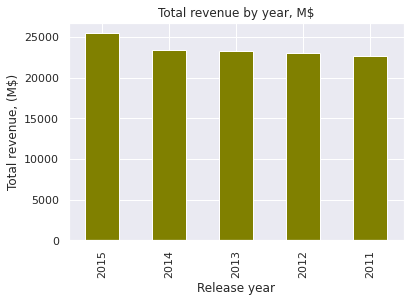

In [89]:
plot_19 = data_19a.apply(lambda x: x/1e6).plot(
    kind='bar',
    xlabel='Release year',
    ylabel='Total revenue, (M$)',
    color='olive',
)
plot_19.set_title("Total revenue by year, M$");

# 20. Какой самый прибыльный год для студии Warner Bros?

In [90]:
answers['20'] = '1. 2014'

In [91]:
# Method 1 (filter by contains('warner bros'), group by release_year, sum by profit) :
data_20a = data[data.production_companies.str.lower().str.contains('warner bros')].copy()
data_20a = data_20a.groupby('release_year').sum().sort_values(by='profit', ascending=False)['profit']
data_20a.head(5)

release_year
2014    2295464519
2007    2201675217
2008    2134595031
2010    1974712985
2011    1871393682
Name: profit, dtype: int64

In [92]:
# make double check. Method 2 (filter by contains('warner bros'), group and sum by pivot table) :
data_20b = data[data.production_companies.str.lower().str.contains('warner bros')].copy()
data_20b.pivot_table(
    values='profit', 
    index='release_year',
    aggfunc='sum', 
    fill_value=0).sort_values(by='profit', ascending=False).head(5)

,profit
release_year,
2014,2295464519
2007,2201675217
2008,2134595031
2010,1974712985
2011,1871393682


In [93]:
# Check how many various "Warner Bros" included into dataset :
data_20c = data.copy()
data_20c['production_companies'] = data_20c['production_companies'].apply(lambda x: x.split('|'))
data_20c = data_20c.explode('production_companies')
data_20c[data_20c.production_companies.str.contains('Warner Bro')].production_companies.unique()
# В датасете 4 компании Warner Bros
# Warner Bros.
# Warner Bros. Animation
# Warner Bros. Interactive Entertainment
# Warner Bros. Pictures

array(['Warner Bros.', 'Warner Bros. Animation',
       'Warner Bros. Interactive Entertainment', 'Warner Bros. Pictures'],
      dtype=object)

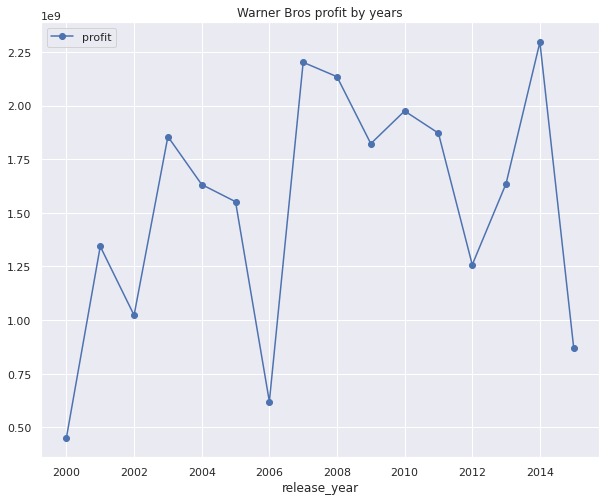

In [94]:
# Default heatmap
plot_20 = data_20a.reset_index().sort_values(by='release_year').plot(
    'release_year',
    'profit',
#     data=data_20a.reset_index().sort_values(by='release_year'), 
    linestyle='-', 
    marker='o',
    figsize=(10,8) # chart size
)
plot_20.set_title("Warner Bros profit by years");

# 21. В каком месяце за все годы суммарно вышло больше всего фильмов?

In [95]:
answers['21'] = '4. Сентябрь'

In [96]:
# Method 1 (value_counts release_month)
data_21 = data.copy()
data_21['release_month'] = data_21.release_date.apply( lambda x: int(x.split('/')[0]) )
data_21a = data_21.release_month.value_counts()
data_21a

9     227
12    190
10    186
8     161
3     156
4     149
6     147
11    146
7     142
5     140
2     135
1     110
Name: release_month, dtype: int64

In [97]:
# make double check. Method 2 (Counter release_month)
c = Counter(data_21['release_month'])
c.most_common(3)

[(9, 227), (12, 190), (10, 186)]

In [98]:
# make double check. Method 4 (Group by release_month)
data_21.groupby('release_month').count().sort_values(by='revenue', ascending=False).head(3)

,imdb_id,budget,revenue,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_average,release_year,profit
release_month,,,,,,,,,,,,,,,
9,227,227,227,227,227,227,227,227,227,227,227,227,227,227,227
12,190,190,190,190,190,190,190,190,190,190,190,190,190,190,190
10,186,186,186,186,186,186,186,186,186,186,186,186,186,186,186


Text(0.5, 1.0, 'Movie releases by years')

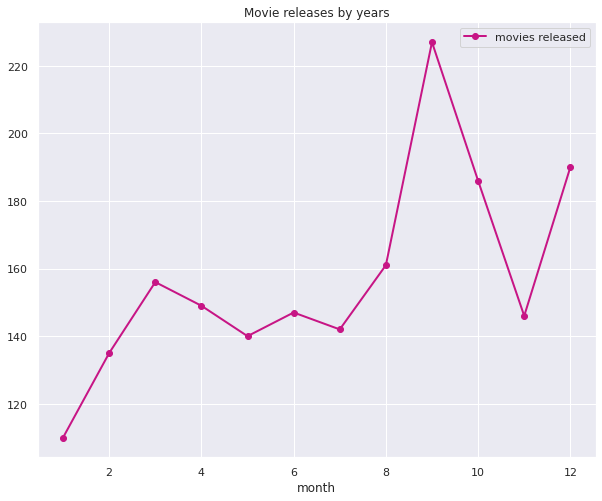

In [99]:
# Default heatmap
plot_21 = data_21a.reset_index().rename(columns={'index':'month', 'release_month':'movies released'})\
    .sort_values(by='month').plot(
    'month',
    'movies released',
#     data=data_20a.reset_index().sort_values(by='release_year'), 
    linestyle='-', 
#     linestyle='dashed',
    linewidth=2, 
    
    marker='o',
#     markersize=12,
    color='mediumvioletred',
    figsize=(10,8) # chart size
)
plot_21.set_title("Movie releases by years")

# 22. Сколько суммарно вышло фильмов летом? (за июнь, июль, август)

In [100]:
answers['22'] = '2. 450'

In [101]:
# Method 1 (isin([..,..]))
data_22 = data.copy()
data_22['release_month'] = data_22.release_date.str.split('/')
data_22['release_month'] = data_22.release_date.apply( lambda x: int(x.split('/')[0]) )
data_22[data_22.release_month.isin([6,7,8])].release_month.count()

450

In [102]:
# make double check. Method 2 (pivot_table)
data_22[data_22.release_month.isin([6,7,8])].pivot_table(
    values='release_date',
    index='release_month',
    aggfunc='count',
    margins=True
)

,release_date
release_month,
6,147
7,142
8,161
All,450


In [103]:
# make double check. Method 3 (query by release_month)
data_22.query('6<=release_month<=8').count()[0]

450

In [104]:
# make double check. Method 4 (str to_datetime; filter Jun,Jul,Aug & get len of df ) :
data_22b = data.copy()
data_22b['release_date'] = pd.to_datetime(data_22b['release_date'])
len(data_22b[data_22b['release_date'].dt.month.isin([6,7,8])])

450

In [105]:
# make double check. Method 5 (str to_datetime; groupby by month & count & sum Jun,Jul,Aug only ) :
data_22b = data.copy()
data_22b['release_date'] = pd.to_datetime(data_22b['release_date'])
sum(data_22b.groupby(data_22b['release_date'].dt.month)['imdb_id'].count().loc[[6,7,8]])

450

# 23. Для какого режиссера зима – самое продуктивное время года? 

In [106]:
answers['23'] = '5. Peter Jackson'

In [107]:
# Method 1 (extract month release_month; explode directors; isin winter month, value_counts by director) :
data_23 = data.copy()
data_23['release_month'] = data_23.release_date.apply( lambda x: int(x.split('/')[0]) )
data_23['director'] = data_23.director.str.lower().str.split('|')
data_23 = data_23.explode('director')
data_23[data_23['release_month'].isin([12,1,2])].director.value_counts().head(5)

peter jackson        7
clint eastwood       6
steven soderbergh    6
shawn levy           4
nancy meyers         4
Name: director, dtype: int64

In [108]:
# make double check. Method 2 (extract month release_month; explode directors; isin winter month, groupby+count) :
data_23[data_23['release_month'].isin([12,1,2])]\
    .groupby('director').imdb_id.count().sort_values(ascending=False).head(5)

director
peter jackson        7
steven soderbergh    6
clint eastwood       6
shawn levy           4
adam shankman        4
Name: imdb_id, dtype: int64

# 24. Какая студия дает самые длинные названия своим фильмам по количеству символов?

### from Slack by Sergey Meshcheryakov: 
**Просто находите фильм с самым длинным названием (включая любые символы) и смотрите какие студии его выпустили.**

In [109]:
answers['24'] = '5. Four By Two Productions'

In [110]:
# Method 1 (filter by longest original_title; convert str production_companies to list)
data_24 = data.copy()
production_companies = data_24[data_24.original_title.str.len() == data_24.original_title.str.len().max()]\
    .production_companies.str.split('|')
for production_company in production_companies:
    print(production_company)
# # WRONG: search by mean(len("original_title"))
# data_24['production_company'] = data_24.production_companies.str.lower().str.split('|')
# data_24 = data_24.explode('production_company')
# data_24['original_title_len'] = data_24.original_title.str.len()
# data_24.groupby('production_company').mean().original_title_len.sort_values(ascending=False)

['Twentieth Century Fox Film Corporation', 'Four By Two Productions']


In [111]:
# make double check. Method 2 (explode & pivot_table by original_title_len)
data_24b = data.copy()
data_24b['production_company'] = data_24b.production_companies.str.lower().str.split('|')
data_24b = data_24b.explode('production_company')
data_24b['original_title_len'] = data_24b.original_title.str.len()
data_24b.pivot_table(
    values='original_title_len',
    index='production_company',
    aggfunc='max'
).sort_values(by='original_title_len', ascending=False).head(3)

,original_title_len
production_company,
four by two productions,83
twentieth century fox film corporation,83
walden media,62


# 25. Описание фильмов какой студии в среднем самые длинные по количеству слов?

In [112]:
answers['25'] = '3. Midnight Picture Show'

In [113]:
# Method 1 (explode production_company; groupby by production_company & mean by overview_len) :
data_25 = data.copy()
data_25['production_company'] = data_25.production_companies.str.lower().str.split('|')
data_25 = data_25.explode('production_company')
data_25['overview_len'] = data_25.overview.str.len()
data_25.groupby('production_company').mean().overview_len.sort_values(ascending=False)

production_company
midnight picture show                    1000.0
room 9 entertainment                      964.0
brookwell-mcnamara entertainment          936.0
crest animation productions               909.0
lions gate family entertainment           909.0
                                          ...  
henceforth                                 74.0
projection pictures                        74.0
phantom four                               72.0
empire pictures                            62.0
motion picture corporation of america      59.0
Name: overview_len, Length: 1764, dtype: float64

In [114]:
# make double check. Method 2
data_25.pivot_table(
    values='overview_len',
    index='production_company',
    aggfunc='mean'
).sort_values(by='overview_len', ascending=False).head(3)

,overview_len
production_company,
midnight picture show,1000.0
room 9 entertainment,964.0
brookwell-mcnamara entertainment,936.0


# 26. Какие фильмы входят в 1 процент лучших по рейтингу? 
Note: by vote_average

#### <span style="color:red">Problem</span>: not clear, is 1% to be applied to list of all moovies or 1% is top bin from vote_average ?

In [115]:
answers['26'] = '1. Inside Out, The Dark Knight, 12 Years a Slave'

In [116]:
# Method 1 (sort_values by vote_average & slice 1% of df length) :
data_26 = data.copy()
data_26.sort_values(by='vote_average',ascending=False).iloc[:int(len(data_26)*0.01)]\
    [['imdb_id', 'original_title','vote_average']]

,imdb_id,original_title,vote_average
599,tt0468569,The Dark Knight,8.1
118,tt0816692,Interstellar,8.0
125,tt2084970,The Imitation Game,8.0
9,tt2096673,Inside Out,8.0
34,tt3170832,Room,8.0
1183,tt0993846,The Wolf of Wall Street,7.9
128,tt2267998,Gone Girl,7.9
1191,tt2024544,12 Years a Slave,7.9
119,tt2015381,Guardians of the Galaxy,7.9
1081,tt0167260,The Lord of the Rings: The Return of the King,7.9


In [117]:
# make double check. Method 2 (sort_values by vote_average & head 1% of df length) :
data_26.sort_values(by='vote_average', ascending=False).head(int(len(data_26)*0.01))\
    [['imdb_id','original_title','vote_average']]

,imdb_id,original_title,vote_average
599,tt0468569,The Dark Knight,8.1
118,tt0816692,Interstellar,8.0
125,tt2084970,The Imitation Game,8.0
9,tt2096673,Inside Out,8.0
34,tt3170832,Room,8.0
1183,tt0993846,The Wolf of Wall Street,7.9
128,tt2267998,Gone Girl,7.9
1191,tt2024544,12 Years a Slave,7.9
119,tt2015381,Guardians of the Galaxy,7.9
1081,tt0167260,The Lord of the Rings: The Return of the King,7.9


In [118]:
# make double check. Method 3 (filter vote_average >  vote_average.quantile(99%)) :
data_26[data_26.vote_average > data_26.vote_average.quantile(0.99)]\
    [['imdb_id','original_title','vote_average']].sort_values(by='vote_average', ascending=False)

,imdb_id,original_title,vote_average
599,tt0468569,The Dark Knight,8.1
9,tt2096673,Inside Out,8.0
34,tt3170832,Room,8.0
118,tt0816692,Interstellar,8.0
125,tt2084970,The Imitation Game,8.0
119,tt2015381,Guardians of the Galaxy,7.9
128,tt2267998,Gone Girl,7.9
138,tt2278388,The Grand Budapest Hotel,7.9
370,tt1375666,Inception,7.9
872,tt0253474,The Pianist,7.9


In [119]:
# make double check. Method 4 (filter vote_average >  np.percentile(vote_average, 99%)) :
data_26[data_26.vote_average > np.percentile(data_26['vote_average'], 99)]\
    [['imdb_id','original_title','vote_average']].sort_values(by='vote_average', ascending=False)

,imdb_id,original_title,vote_average
599,tt0468569,The Dark Knight,8.1
9,tt2096673,Inside Out,8.0
34,tt3170832,Room,8.0
118,tt0816692,Interstellar,8.0
125,tt2084970,The Imitation Game,8.0
119,tt2015381,Guardians of the Galaxy,7.9
128,tt2267998,Gone Girl,7.9
138,tt2278388,The Grand Budapest Hotel,7.9
370,tt1375666,Inception,7.9
872,tt0253474,The Pianist,7.9


In [120]:
# by Сергей Гринцевич :
# https://lms.skillfactory.ru/courses/course-v1:Skillfactory+DST-PRO+15APR2020/course/#block-v1:Skillfactory+DST-PRO+15APR2020+type@sequential+block@11e1615dfa9b4ce7aade636fbd5bff19
percent_rating_value = 1
data_26[['original_title','vote_average']].loc[data_26.vote_average.sort_values(ascending=False)
                    [0:round(percent_rating_value*len(data)/100)-1].index]

,original_title,vote_average
599,The Dark Knight,8.1
118,Interstellar,8.0
125,The Imitation Game,8.0
9,Inside Out,8.0
34,Room,8.0
1183,The Wolf of Wall Street,7.9
128,Gone Girl,7.9
1191,12 Years a Slave,7.9
119,Guardians of the Galaxy,7.9
1081,The Lord of the Rings: The Return of the King,7.9


# 27. Какие актеры чаще всего снимаются в одном фильме вместе?


In [121]:
answers['27'] = '5. Daniel Radcliffe & Rupert Grint'

In [122]:
# Method 1 (cast to list; combinations(actors_list), Counter(actors_pair)) :
from itertools import combinations
from collections import Counter

data_27 = data.copy()
# convert text(actor_x|actor_y) to list(actor_x, acor_y) :
data_27['actors_list'] = data_27.cast.str.lower().str.split('|')
# initiate empty counter
c = Counter() 
for actors_list in  data_27.actors_list:
    for actors_pair in combinations(actors_list, 2):
        c[actors_pair] +=1

c.most_common(3)

[(('daniel radcliffe', 'rupert grint'), 8),
 (('daniel radcliffe', 'emma watson'), 8),
 (('rupert grint', 'emma watson'), 7)]

In [123]:
# make double check. Method 2 (cast to list; chain all lists; combinations(actors_list), Counter(actors_pair))
from itertools import chain

data_27b = data.copy()
chained_lists = chain(data_27b.cast.str.lower().str.split('|'))
c2 = Counter() 
for actors_list in chained_lists:
    for actors_pair in combinations(actors_list, 2):
        c2[actors_pair] +=1

c2.most_common(3)

[(('daniel radcliffe', 'rupert grint'), 8),
 (('daniel radcliffe', 'emma watson'), 8),
 (('rupert grint', 'emma watson'), 7)]

# Submission

In [124]:
# в конце можно посмотреть свои ответы к каждому вопросу
answers

{'1': '5. Pirates of the Caribbean: On Stranger Tides (tt1298650)',
 '2': '2. Gods and Generals (tt0279111)',
 '3': '3. Winnie the Pooh (tt1449283)',
 '4': '2. 110',
 '5': '1. 107',
 '6': '5. Avatar (tt0499549)',
 '7': '5. The Lone Ranger (tt1210819)',
 '8': '1. 1478',
 '9': '4. The Dark Knight (tt0468569)',
 '10': '5. The Lone Ranger (tt1210819)',
 '11': '3. Drama',
 '12': '1. Drama',
 '13': '5. Peter Jackson',
 '14': '3. Robert Rodriguez',
 '15': '3. Chris Hemsworth',
 '16': '3. Matt Damon',
 '17': '2. Action',
 '18': '1. K-19: The Widowmaker (tt0267626)',
 '19': '5. 2015',
 '20': '1. 2014',
 '21': '4. Сентябрь',
 '22': '2. 450',
 '23': '5. Peter Jackson',
 '24': '5. Four By Two Productions',
 '25': '3. Midnight Picture Show',
 '26': '1. Inside Out, The Dark Knight, 12 Years a Slave',
 '27': '5. Daniel Radcliffe & Rupert Grint'}

In [125]:
# и убедиться что ни чего не пропустил)
len(answers)

27